### Show a plot of the total number of responses.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
df= pd.read_csv('cleaned_marketing_customer_analysis.csv')
df.head()
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       10910 non-null  object 
 1   State                          10279 non-null  object 
 2   Customer Lifetime Value        10910 non-null  float64
 3   Response                       10279 non-null  object 
 4   Coverage                       10910 non-null  object 
 5   Education                      10910 non-null  object 
 6   Effective To Date              10910 non-null  object 
 7   EmploymentStatus               10910 non-null  object 
 8   Gender                         10910 non-null  object 
 9   Income                         10910 non-null  int64  
 10  Location Code                  10910 non-null  object 
 11  Marital Status                 10910 non-null  object 
 12  Monthly Premium Auto           10910 non-null 

In [153]:
df.count()

Customer                         10910
State                            10279
Customer Lifetime Value          10910
Response                         10279
Coverage                         10910
Education                        10910
Effective To Date                10910
EmploymentStatus                 10910
Gender                           10910
Income                           10910
Location Code                    10910
Marital Status                   10910
Monthly Premium Auto             10910
Months Since Last Claim          10277
Months Since Policy Inception    10910
Number of Open Complaints        10277
Number of Policies               10910
Policy Type                      10910
Policy                           10910
Renew Offer Type                 10910
Sales Channel                    10910
Total Claim Amount               10910
Vehicle Class                    10288
Vehicle Size                     10288
Vehicle Type                      5428
Month                    

  Response  Count
0       No   8813
1      Yes   1466


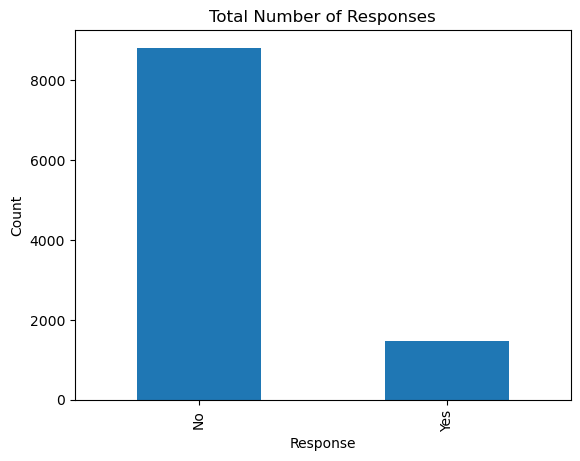

In [154]:
response_counts = df['Response'].value_counts()
response_df = pd.DataFrame({'Response': response_counts.index, 'Count': response_counts.values})
print(response_df)
response_counts.plot(kind='bar')

# Set plot title and labels
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Count')

# Display the plot
plt.show()

### Show a plot of the response by the sales channel.

In [155]:
df['Sales Channel'] 

0              Agent
1        Call Center
2        Call Center
3             Branch
4             Branch
            ...     
10905            Web
10906         Branch
10907            Web
10908         Branch
10909            Web
Name: Sales Channel, Length: 10910, dtype: object

In [156]:
df['Sales Channel'].value_counts() 

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: Sales Channel, dtype: int64

In [157]:
df['Sales Channel'].value_counts()[:20]

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: Sales Channel, dtype: int64

<Axes: >

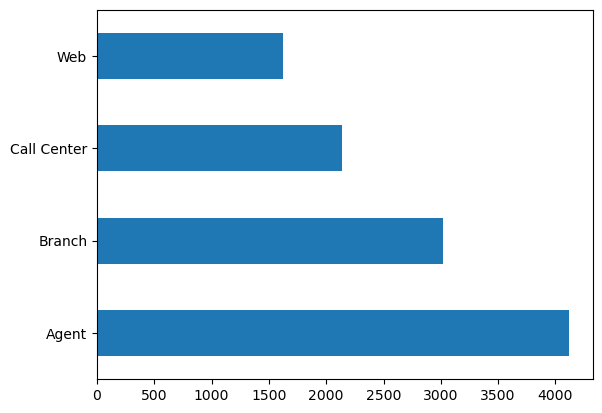

In [158]:
df['Sales Channel'].value_counts()[:20].plot(kind='barh')

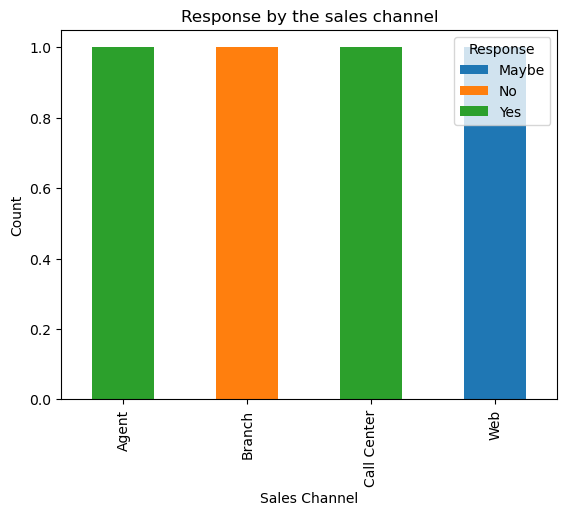

In [159]:
data = {'Sales Channel':['Agent', 'Branch', 'Call Center', 'Web'],
        'Response': ['Yes', 'No', 'Yes', 'Maybe']}
df = pd.DataFrame(data)

response_counts = df.groupby('Sales Channel')['Response'].value_counts().unstack().fillna(0)


response_counts.plot(kind='bar', stacked=True)


plt.title('Response by the sales channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')

plt.show()

### Show a plot of the response by the total claim amount.

In [163]:
df['Total Claim Amount'] 

0          Agent
1         Branch
2    Call Center
3            Web
Name: Total Claim Amount, dtype: object

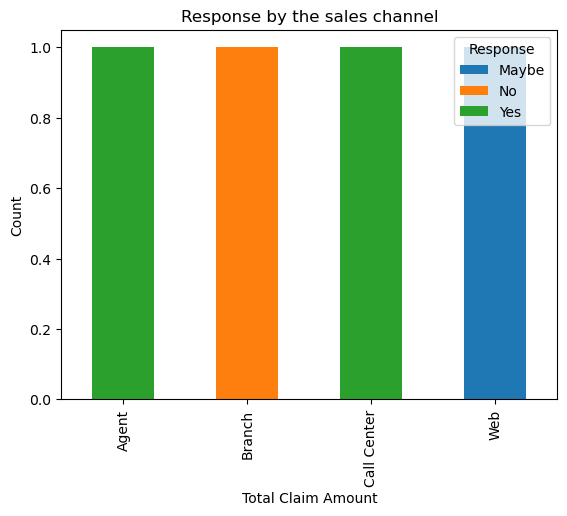

In [161]:
data = {'Total Claim Amount':['Agent', 'Branch', 'Call Center', 'Web'],
        'Response': ['Yes', 'No', 'Yes', 'Maybe']}
df = pd.DataFrame(data)

response_counts = df.groupby('Total Claim Amount')['Response'].value_counts().unstack().fillna(0)


response_counts.plot(kind='bar', stacked=True)


plt.title('Response by the sales channel')
plt.xlabel('Total Claim Amount')
plt.ylabel('Count')

plt.show()

#### Show a plot of the response by income.